In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [2]:
model = VGG19(include_top=True, weights='imagenet')

In [3]:
image_size = (224, 224)

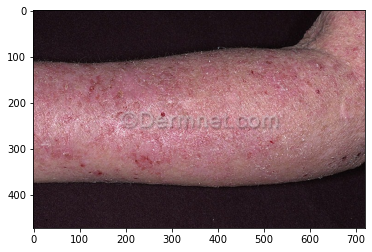

In [4]:
img = mpimg.imread('test/Eczema Photos/03DermatitisArm1.jpg')
imgplot = plt.imshow(img)
plt.show()

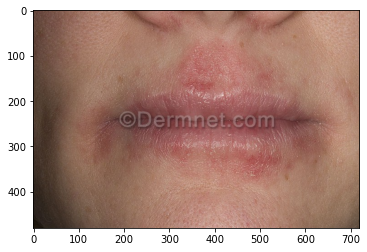

In [5]:
img = mpimg.imread('test/Atopic Dermatitis Photos/05atopic0110053.jpg')
imgplot = plt.imshow(img)
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

In [7]:
img_width = 224
img_height = 224

In [8]:
#Creating training and test data firectory
train_data_dir = r"train"
testing_data_dir = r"test"
nb_test_sample = 100
nb_train_sample = 100
epochs = 20
batch_size = 20

In [9]:
#Trying to check the shape of the image and represent in a 3D array this is because most images have a zoom factor
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape=(img_width, img_height, 3)

In [10]:
test_datagen = ImageDataGenerator(rescale=1. /224)

train_datagen = ImageDataGenerator(rescale=1. /224, shear_range = 0.2, zoom_range=0.2, horizontal_flip =True)

In [11]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size = (img_width, img_height), batch_size = batch_size, 
                                                    class_mode = 'binary')

# , classes = ['Eczema', 'Atopic Dermatitis']
test_generator = test_datagen.flow_from_directory(testing_data_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode = 'binary')

#I used binary cause I'm trying out only two classes for now

Found 15557 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

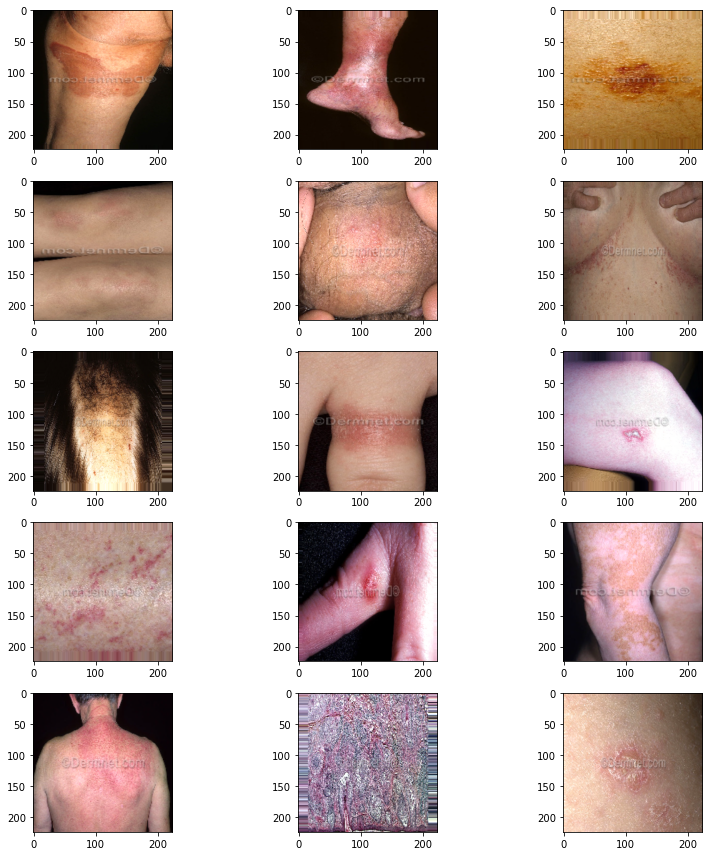

In [12]:
plt.figure(figsize=(12,12))
for i in range (0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [13]:
# Trying to build the CNN Model :(
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))
#Allows CNN to extract certain featurs of the images....i think

In [14]:
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#found out it is used to rduce the size of the data

In [15]:
model.add(Flatten())
model.add(Dense(64)) #64 neurons

In [16]:
#Number of output nodes
model.add(Activation('relu'))
model.add(Dense(1))# output layer
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 788544)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                50466880  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [19]:
training = model.fit_generator(train_generator,
                              steps_per_epoch = nb_train_sample, epochs = epochs, test_data = test_generator, test_steps = nb_test_sample)

TypeError: fit_generator() got an unexpected keyword argument 'test_data'